In [1]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<20-Series Solutions for f and g.ipynb>)

# A (Minor) Annoyance

While we have now provided ourselves with methods for propagating any type of orbit corresponding to any of the open or closed conic sections, there's an extra bit of processing that constantly has to happen as we check on the type of orbit we're dealing with, and determine which anomaly we should be calculating, and which equations we should be applying.  This isn't really a huge deal, but it does tend to make code more complicated, and more complex code invariably means buggier code.  More importantly, it's not *elegant*. We have a completely unified description of *all* orbit types via the orbital state vectors.  Why can't we have a unified description in orbital elements?

<div class="alert alert-block alert-danger">
    Never underestimate the importance of the dual principles of parsimony and elegance in science and engineering.  There's not only beauty, but extreme utility in simplicity.  Simple solutions should always be preferred to more complex ones because simple solutions are so much less likely to fail in new and exciting ways, just when you least expect them to.  Note, however, that 'simple' is not synonymous with 'brief', especially when it comes to code.  If your incredibly clever one-liner replaces a dozen lines of code but is incomprehensible to anyone but you, then it is not the more elegant solution.  When using highly idiomatic languages like Python, elegance resides in utilizing the language's standard idioms, and eschewing obscure and confuscated approaches.
</div>

# A Universal Variable

Turns out, it is entirely possible to define a single auxiliary variable (in place of the eccentric, parabolic, and hyperbolic anomalies) and to create a (mostly) unified orbital element description of all orbits.  Getting there, however, is not entirely straightforward, but fortunately this is well-trod ground.  In particular, we will be following in the footsteps of Battin, and adopting much of the nomenclature and conventions from his various articles and books.

We start by returning to the [orbital specific energy](<14-Keplers Laws Continued.ipynb#Effective-Potential>):
$$\mc E = \frac{v^2}{2} - \frac{\mu}{r} = -\frac{\mu}{2a} = \frac{\dot r^2}{2} - \frac{\mu}{r} +  \frac{h^2}{2r^2} $$

Solving the last two expressions for $\dot r^2$, we have:
$$\dot r^2 = \frac{2\mu}{r} - \frac{h^2}{r^2} - \frac{\mu}{a} = \frac{2\mu}{r} - \frac{\mu\ell}{r^2} - \frac{\mu}{a} $$
where we substituted $h = \sqrt{\mu\ell}$ in the final expression.

We now define our universal variable $\chi$ via its derivative, such that:
<div class="alert alert-block alert-info">
    $$\dot\chi \triangleq \frac{\sqrt{\mu}}{r}$$
</div>

Let's consider the expression:
$$ \left(\frac{\dot r}{\chi}\right)^2 = \left(\frac{ \dfrac{\intd{r}}{\intd{t}} }{\dfrac{\intd{\chi}}{\intd{t}} }\right)^2 = \left(\dfrac{\intd{r}}{\intd{\chi}}\right)^2 $$

Substituting in the expression we derived above for $\dot r^2$ and our definition for $\dot \chi$, we thus have:
$$\left(\dfrac{\intd{r}}{\intd{\chi}}\right)^2  = \left(\frac{2\mu}{r} - \frac{\mu\ell}{r^2} - \frac{\mu}{a}\right) \left(\frac{r^2}{\mu}\right) = 2r - \ell - \frac{r^2}{a}$$

Taking the square root of the whole expression and separating variables, we have:
$$\intd{\chi} = \left( 2r - \ell - \frac{r^2}{a}\right)^{-\frac{1}{2}} \intd{r} \quad \Longrightarrow \quad \int \intd{\chi} = \sqrt{a} \int \frac{\intd{r}}{\sqrt{2 a r - a l - r^{2}}}$$

At this point, we reach for our handy table of integrals to find that:

$$ \int \frac{\intd{x}}{\sqrt{c^2 - x^{2}}} = \sin^{-1}\left(\frac{x}{c}\right)$$

<div class="alert alert-block alert-danger">
    What? You don't have a handy table of integrals?  Shame on you.  Print one out immediately and put it wherever you stuck your table of trigonometric identities. Better yet, don't waste paper but always know where you can access one. 
</div>

Let's let $x = 2\left(1 - \dfrac{r}{a}\right)$. Then: $\intd{x} = -\dfrac{2}{a}\intd{r}$ and so:
$$\frac{\intd{r}}{\sqrt{2 a r - a l - r^{2}}} = - \frac{\intd{x}}{\sqrt{4\left(1 - \dfrac{l}{a}\right) - x^{2}}} $$
meaning that in this case $c = 4\left(1 - \dfrac{l}{a}\right)$ and the integration works out to:
$$ \chi + c_0 = - \sqrt{a}\sin^{-1}\left( \frac{2\left(1 - \dfrac{r}{a}\right)}{\sqrt{4\left(1 - \dfrac{l}{a}\right)}}\right) = \sqrt{a}\sin^{-1}\left( \frac{\left(\dfrac{r}{a}-1\right)}{e}\right)$$
where $c_0$ is our constant of integration and we substituted $\ell = a(1-e^2)$. 

At this point, we can solve for $r$ as a function of $\chi$ and write:
$$r = a\left(1 + e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right)\right)$$

## Negative Semi-Major Axes
This is great and all, but there's a slight problem here.  In order to have carried out this integration, we were forced to assume that $a$ is positive (did you catch it - it happened when we moved the $\sqrt{a}$ term outside of the integrand).  By inspection, we see that this expression for $r$ doesn't make sense for a negative $a$, which would lead to imaginary orbital radii. 

We set out to find a unified description of all orbits, but on practically our first step, we found ourselves assuming a positive semi-major axis, thus producing expressions valid for only closed orbits.  However, we will be saved here by one super convenient fact:

$$ \int \frac{\intd{x}}{\sqrt{c^2 + x^{2}}} = \sinh^{-1}\left(\frac{x}{c}\right)$$

We have already seen that the trigonometric and hyperbolic functions operate in very similar fashions, with basically the same identities. If we can show that we get an equivalent $\sinh$ form for negative $a$, then everything we figure out under the positive $a$ assumption should still work for negative $a$ values. So let's see what happens when we assume that $a$ is strictly negative.  Just to make things clearer, we'll define $a_n \triangleq -a$, such that $a_n$ is positive for negative $a$.  We thus have:
$$\intd{\chi} = \left( 2r - \ell + \frac{r^2}{a_n}\right)^{-\frac{1}{2}} \intd{r} \quad \Longrightarrow \quad \int \intd{\chi} = \sqrt{a_n} \int \frac{\intd{r}}{\sqrt{2 a_n r - a_n l + r^{2}}}$$

In this case, we'll take $x = 2\left(1 + \dfrac{r}{a_n}\right)$, such that $\intd{x} = \dfrac{2}{a_n}\intd{r}$ and:
$$\frac{\intd{r}}{\sqrt{2 a_n r - a_n l + r^{2}}} = \frac{\intd{x}}{\sqrt{-4\left(1 + \dfrac{l}{a_n}\right) + x^{2}}} $$

So, for the hyperbolic case, we have:
$$ \chi + c_0 = \sqrt{a_n}\sinh^{-1}\left( \frac{2\left(1 + \dfrac{r}{a_n}\right)}{\sqrt{-4\left(1 + \dfrac{l}{a_n}\right)}}\right) = \sqrt{-a}\sinh^{-1}\left( \frac{\left(1 - \dfrac{r}{a}\right)}{e}\right)$$
As with our previous treatments of hyperbolic orbits, we see that we get exactly the same forms as in the elliptical case, save for use of hyperbolic functions and sign flips.  We will thus proceed with the rest of our derivation using the positive $a$ assumption, knowing that we can readily adapt our results to the hyperbolic case without too much extra work.

# Universal Variable Initial Conditions

Returning to our orbital radius expression as a function of $\chi$, we now plug this back into our original definition of $\dot \chi$ to get:
$$\dot\chi \triangleq \frac{\sqrt{\mu}}{r} = \frac{\sqrt{\mu}}{a\left(1 + e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right)\right)}$$

Again separating variables, we have:
$$\intd{\chi}\left(a\left(1 + e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right)\right) \right) = \intd{t}\sqrt{\mu}$$
which we integrate to find:

$$a \left.\left( \chi - \sqrt{a}e \cos\left( \frac{\chi + c_o}{\sqrt{a}} \right) \right)\right\vert_{\chi(t_0)}^{\chi(t)} = \sqrt{\mu}\underbrace{t - t_0}_{\displaystyle \triangleq \Delta{t}}$$

Without loss of generality, we can assume that $\chi(t_0) \equiv 0$, as $\chi$ is an arbitrary auxiliary variable and can be associated with time in any way we see fit. For notational convenience, we will henceforth assume that $\chi$ represents $\chi(t)$. Expanding out our integrated expression (and utilizing the cosine angle addition identity), we now have:

$$ \sqrt{\mu}\Delta{t} = a\chi - a^{\frac{3}{2}}e\left(\underbrace{\cos\left(\frac{\chi}{\sqrt{a}}\right)\cos\left(\frac{c_0}{\sqrt{a}}\right) - \sin\left(\frac{\chi}{\sqrt{a}}\right)\sin\left(\frac{c_0}{\sqrt{a}}\right)}_{\displaystyle \equiv \cos\left(\frac{\chi + c_0}{\sqrt{a}}\right)} - \cos\left(\frac{c_0}{\sqrt{a}}\right)\right) $$

Returning to our radius expression, we can define $r_0$ as the radius at $t_0$:

$$r_0 \triangleq r(t_0) =  a\left(1 + e\sin\left(\frac{c_o}{\sqrt{a}} \right)\right) \quad \Longrightarrow \quad e\sin\left(\frac{c_o}{\sqrt{a}}\right) = \frac{r_0}{a} - 1$$

where we have once again taken advantage of our setting $\chi(t_0)$ to be zero.

Differentiating the radius expression:

$$\dot r = \frac{ae}{\sqrt{a}} \dot\chi \cos\left(\frac{\chi + c_0}{\sqrt{a}}\right)\quad \Longrightarrow \quad  \frac{r\dot{r}}{\sqrt{\mu a}} = e \cos\left(\frac{\chi + c_0}{\sqrt{a}}\right)$$

where we substituted in $\sqrt{\mu}/r$ for $\dot\chi$.

Recall that a byproduct of our derivation of [Lagrange's Fundamental Invarianats](<20-Series Solutions for f and g.ipynb#Lagrange's-Fundamental-Invariants>) was finding that $\mf r \cdot \mf v = r \dot{r}$, meaning that for initial orbit state vectors $\mf r_0 \triangleq \mf r(t_0)$ and $\mf v_0 \triangleq \mf v(t_0)$ we have:

$$e \cos\left(\frac{c_0}{\sqrt{a}}\right) = \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu a}}$$

Note that we now have expression for both the cosines and sine terms in $c_0$ appearing in our expanded, integrated equation for $\sqrt{\mu}\Delta{t}$, above.  Note that each is also scaled by eccentricity, which means that we can eliminate both $c_0$ and the eccentricity from this expression entirely by substituting in these new equations.  Let's do so and see where we're at:

$$\sqrt{\mu}\Delta{t} = a\chi - a^{\frac{3}{2}}\left(\cos\left(\frac{\chi}{\sqrt{a}}\right)\left( \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu a}}\right) - \sin\left(\frac{\chi}{\sqrt{a}}\right)\left(\frac{r_0}{a} - 1\right) -\left( \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu a}}\right)\right)$$

We can similarly eliminate $c_0$ from our $r$ expression by first expanding and then substituting:
$$\begin{split}
r &= a\left(1 + e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right)\right) = a + ae\left(\sin\left(\frac{\chi}{\sqrt{a}} \right)\cos\left(\frac{c_0}{\sqrt{a}}\right)+ \sin\left(\frac{c_0}{\sqrt{a}} \right)\cos\left(\frac{\chi}{\sqrt{a}}\right)\right)\\
&= a + a\left(\sin\left(\frac{\chi}{\sqrt{a}} \right)\left( \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu a}}\right) + \left(\frac{r_0}{a} - 1\right)\cos\left(\frac{\chi}{\sqrt{a}}\right)\right)
\end{split}
$$


# Universal Variable Unification

Let's regroup.  At this point we have an expression for the orbital radius magnitude at a time $t$ (which, as usual, we can relate to some initial time $t_0$ as $t = t_0 + \Delta{t}$) as a function of $\chi$, the orbital state vectors at $t_0$, and the gravitational parameter and semi-major axis.  We similarly have an expression for $\Delta{t}$ as a function of all of the same quantities.  All that's left for us to do in order to propagate our orbits using the universal variable formulation is to actually find $\chi(t)$.

To help us along, we define a new variable:

$$ \psi \triangleq \frac{\chi^2}{a} $$

noting that $\psi$ will be positive for closed orbits and negative for open orbits (and zero for parabolae). Substituting into our equations, we now have:

$$\begin{split}
r& = \chi^2\left(\frac{1 - \cos\left(\sqrt{\psi}\right)}{\psi}\right) + \left( \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\right)\chi\left(1 - \psi \frac{\sqrt{\psi} - \sin\left(\sqrt{\psi}\right)}{\sqrt{\psi^3}}\right) + r_0\left( 1 - \psi \frac{\sqrt{\psi} - \cos\left(\sqrt{\psi}\right)}{\sqrt{\psi}}\right)\\
\sqrt{\mu}\Delta{t} &= \chi^3 \left( \frac{\sqrt{\psi} - \sin\left(\sqrt{\psi}\right)}{\sqrt{\psi^3}}\right) + \left( \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\right)\chi^2 \left(\frac{1 - \cos\left(\sqrt{\psi}\right)}{\psi}\right) + r_0 \chi\left(1 - \psi \frac{\sqrt{\psi} - \sin\left(\sqrt{\psi}\right)}{\sqrt{\psi^3}}\right)
\end{split}$$

We see that these two expression are built out of the same basic (and frequently repeated) blocks.  Two, in particular, stand out:
$$\frac{\sqrt{\psi} - \sin\left(\sqrt{\psi}\right)}{\sqrt{\psi^3}} \quad \textrm{and} \quad \frac{1 - \cos\left(\sqrt{\psi}\right)}{\psi}$$

An incredible thing happens if we go back and re-derive these two equations under the assumption of a negative $a$. We get exactly the same combinations of terms, save that these two blocks have the forms:
$$\frac{\sinh\left(\sqrt{-\psi}\right) - \sqrt{-\psi}}{\sqrt{-\psi^3}} \quad \textrm{and} \quad \frac{1 - \cosh\left(\sqrt{-\psi}\right)}{\psi}$$


<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Trust! But Verify!
</div>


Here, finally, is our unified universal form.  

<div class="alert alert-block alert-info">
We define:

$$\psi \triangleq \frac{\chi^2}{a}  \qquad c_2 \triangleq \begin{cases}
\displaystyle \frac{1 - \cos\left(\sqrt{\psi}\right)}{\psi} & \psi \ge 0\\
\displaystyle  \frac{1 - \cosh\left(\sqrt{-\psi}\right)}{\psi} & \psi < 0
\end{cases}
\qquad 
c_3 \triangleq \begin{cases}
\displaystyle \frac{\sqrt{\psi} - \sin\left(\sqrt{\psi}\right)}{\sqrt{\psi}^3} & \psi \ge 0\\
\displaystyle \frac{ \sinh\left(\sqrt{-\psi}\right) - \sqrt{-\psi} }{\sqrt{-\psi}^3} & \psi < 0
\end{cases}$$

such that:

$$ \begin{split}
r &= \chi^2 c_2 + \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\chi(1 - \psi c_3)  + r_0\left(1 - \psi c_2\right)\\
\sqrt{\mu}\Delta t &= c _3\chi^3 +  c_2 \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\chi^2 + r_0\chi(1 - \psi c_3)
\end{split}$$
    </div>

# Relating Universal Variables Back to Conic Sections

Let's return to our first expression for $r$ (remembering that it carries the implicit assumption that $a > 0$):
$$r = a\left(1 + e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right)\right) = a(1-e\cos(E))$$

Because this form of $r$ assumes a closed orbit, we can equate it to the equivalent orbital radius expression as a function of eccentric anomaly.  The equality simplifies as:
$$-e\cos(E) = e\sin\left(\frac{\chi + c_o}{\sqrt{a}} \right) = -e\cos\left(\frac{\pi}{2} + \frac{\chi + c_o}{\sqrt{a}}\right)$$
where we have taken advantage of the fact that cosine and sine are exactly phase shifted by 90$^\circ$.  Thus:
$$E = \frac{\pi}{2} + \frac{\chi + c_o}{\sqrt{a}}$$
and
$$\Delta{E} = E - E_0 = \frac{\pi}{2} + \frac{\chi + c_o}{\sqrt{a}} - \left(\frac{\pi}{2} + \frac{\chi(t_0) + c_o}{\sqrt{a}}\right)$$

Recalling that we set $\chi(t_0) \equiv 0$, this means that
$$\Delta{E} = \frac{\chi}{\sqrt{a}}$$

Since the hyperbolic equations end up doing exactly what their trigonometric counterparts do, this also tells us that:
$$\Delta{H} = \frac{\chi}{\sqrt{-a}}$$

For the parabolic case, we have $a = \infty$ which means that $\psi = 0$.

<div class="alert alert-block alert-danger">
  At this point, you might be thinking that $c_2$ and $c_3$ are undefined for $\psi = 0$.  Nope!  You've forgotten about L'Hôpital's rule (or just Taylor Expansion).  Both the numerator and denominator of $c_2$ and $c_3$ evaluate to zero for $\psi = 0$, and so their value is the limit of the derivative of the numerator divided by the derivative of the denominator as $\psi \to 0$.  Working this out, we find that for $\psi = 0$, $c_2 = \dfrac{1}{2}$ and $c_3 = \dfrac{1}{6}$.  Go ahead and check to make sure you agree.
</div>

We thus have:
$$ r =  \chi^2 c_2 + \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\chi(1 - \psi c_3)  + r_0\left(1 - \psi c_2\right) = \frac{ \chi^2 }{2} + \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}} + r_0 $$

Recalling our derivations for [parabolae](<17-Open Orbit Propagation.ipynb#parabolic-rdot>) we can write:
$$\mf r \cdot \mf v = r\dot{r} =  \frac{\ell}{2}(1  + B^2)\frac{2 B \sqrt{\mu}}{\sqrt{l} \left(B^{2} + 1\right)} = \sqrt{\mu\ell}B$$
meaning that $\mf r_0 \cdot \mf v_0 = \sqrt{\mu\ell}B_0$.  Along with $r = \frac{\ell}{2}(1  + B^2)$ and $r_0 = \frac{\ell}{2}(1  + B_0^2)$ we now have:
$$ \frac{\ell}{2}(1  + B^2) =  \frac{ \chi^2 }{2} + \frac{\sqrt{\mu\ell}B_0}{\sqrt{\mu}} + \frac{\ell}{2}(1  + B_0^2) \quad \Longrightarrow \quad \chi^2 + 2\sqrt{\ell}B_0 + \ell\left(B_0^2 - B^2\right) = 0  $$

Applying everyone's favorite quadratic equation, we can solve for $\chi$ as:
$$\chi = \frac{-2\sqrt{\ell}B_0 \pm \sqrt{4\ell B_0^2 - 4\ell\left(B_0^2 - B^2\right)}}{2} = -\sqrt{\ell}B_0 \pm \sqrt{\ell B^2} $$

The negative root in this case is non-physical (leading to strictly negative solutions) so we take the positive root, giving us:
$$ \chi = \sqrt{\ell}(B - B_0) \equiv \sqrt{\ell}\Delta{B}$$

To summarize:
<div class="alert alert-block alert-info">
$$\chi = \begin{cases}
\displaystyle \sqrt{a}\Delta E \vphantom{\frac{\mu^2}{a}} & a > 0\\
\displaystyle \sqrt{\ell} \Delta B \vphantom{\frac{\mu^2}{a}} & a \equiv \infty\\
\displaystyle \sqrt{-a}\Delta H \vphantom{\frac{\mu^2}{a}} & a < 0\\
\end{cases} $$
</div>


# $f$ and $g$ Functions of Universal Variables

We can use any of the forms previously derived for the $f$ and $g$ functions and simply substitute in for the change in anomaly as a function of $\chi$.  For example, taking the equations for [closed orbits](<19-f%20and%20g%20Functions.ipynb#f-and-g-E>):
$$f = \frac{a}{r_0}\left(\cos(\Delta E) - 1\right) + 1 = \frac{a}{r_0}\left(\cos\left(\frac{\chi}{\sqrt{a}}\right) - 1\right) + 1 = \frac{\chi^2}{r_0}\underbrace{\left(\frac{\cos\left(\sqrt{\psi}\right) - 1}{\psi}\right)}_{\displaystyle\equiv -c_2} + 1$$
where we substituted $a = \chi^2/\psi$.  Performing the same type of substitutions, we find:
<div class="alert alert-block alert-info" id="f-and-g-E">
    $$f = 1 - \frac{\chi^2}{r_0}c_2$$
    $$g = \Delta t  - \frac{\chi^3}{\sqrt{\mu}}c_3$$
    $$\dot f = \dfrac{\sqrt{\mu}}{rr_0}\chi\left(\psi c_3 - 1\right)$$
    $$\dot g = 1 - \dfrac{\chi^2}{r}c_2 $$
</div>

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Prove that you retrieve the same form of the $f$ and $g$ functions for $\chi$ starting with any of the previously derived forms for eccentric, hyperbolic, or parabolic anomaly.
</div>

# Universal Variable Propagation

All that's left for us to do now is to figure out how to compute $\chi$ for a given $\Delta t$.  Note that nothing we've done here has mitigated the transcendental nature of the time equation (and nothing ever will). We have hidden away the various trigonometric terms that make our lives difficult, but they're all still there, and there is no way to directly invert the equation for $n\Delta{t}$ to solve for $\chi$.

But that's okay.  We've already provided ourself with a robust method for inverting the time equation via Newton-Raphson iteration, and we can once again return to this well-trod ground here. We go back to our fundamental definition of the universal variable:
$$ \frac{\intd{\chi}}{\intd{t}} = \frac{\sqrt{\mu}}{r} \quad \Longrightarrow\quad \sqrt{\mu}\intd{t} = r\intd{\chi}\quad \Longrightarrow\quad \sqrt{\mu}\Delta{t} = \int r\intd{\chi}$$

We thus take our minimization function to be:
$$ f(\chi) = \sqrt{\mu}\Delta{t} - \int r\intd{\chi} \quad  \Longrightarrow\quad f'(\chi) =\frac{\intd{f}}{\intd{\chi}} = -r$$
with the iterant defined as:
$$ \chi_{n+1} = \chi_n - \frac{f(\chi_n)}{f'(\chi_n)}$$

Note that we have already evaluated the integral of r with respect to $\chi$, above, when finding our original expression for $\sqrt{\mu}\Delta{t}$.  Returning to this result, we can write out the full form of the iterant as:

<div class="alert alert-block alert-info">
$$ \chi_{n+1} = \chi_n + \frac{1}{r}\left( \sqrt{\mu}\Delta t - \chi_n^3 c_3 - \frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}} \chi_n^2 c_2 - r_0 \chi_n(1 - \psi c_3)  \right) $$   
    </div>

## Universal Variable Newton-Raphson Initialization

As always, there is the question of selecting initial conditions. Here again we must treat different conic sections slightly differently.  

### Closed Orbits
Starting with closed orbits, we know that $\chi = \sqrt{a}\Delta{E}$, which means that over a full orbit $\chi = \sqrt{a}2\pi$.  If we think about this expression as a rate, we can rewrite it as:
$\chi T_P = \Delta{t}\sqrt{a}2\pi$.  In general, this is only true when $\Delta{t} \equiv T_P$ (other than for circular orbits, when it is always true).  However, we'll assume the equality always holds and solve for $\chi_0$:
$$\chi_0 = \frac{\Delta{t}\sqrt{a}2\pi}{T_P} =\Delta{t}\sqrt{a}2\pi \left( \frac{2\pi}{\sqrt{\mu}} a^{\frac{3}{2}}  \right)^{-1} = \frac{\sqrt{\mu}\Delta{t}}{a}$$

Let's see how well this works out:

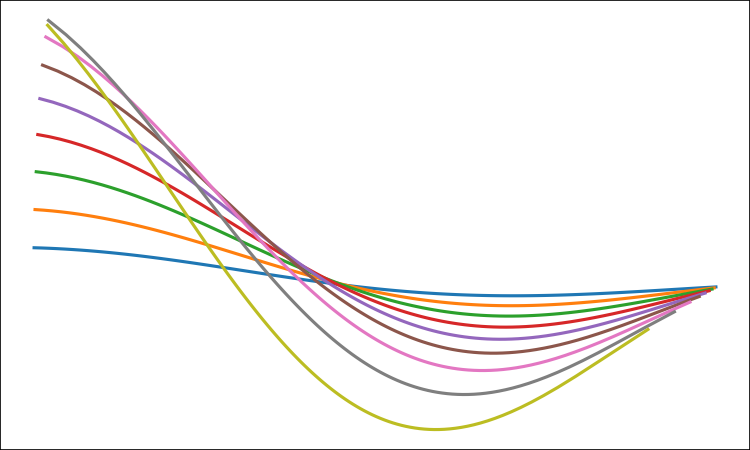

In [2]:
from astrodynamicsbook.kepler import invKepler
a = 1                 # semi-major axis (arbitrary units)
mu = 1                # gravitational parameter (incredibly arbitrary units)
n = np.sqrt(mu/a**3)  # mean motion (units set by a and mu)
M = np.linspace(0.1,2*np.pi-0.01,100) # some mean anomalies
t = M/n                               # time
es = np.arange(0.1,1,0.1)             # eccentricities
dt = t[1:] - t[0]                     # \Delta{t} assuming t_0 is first element of array
chi0 = np.sqrt(mu)*dt/a               # proposed initialization for \chi iterant

true_chis = []
for e in es:
    E,_,nu = invKepler(M, e, return_nu=True) # invert the time equation 
    dE = E[1:] - E[0]                  # \Delta{E}             
    true_chis.append(np.sqrt(a)*dE)    # this is the true \chi value
    
# plot!
%matplotlib widget
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

for chi,e in zip(true_chis,es):
    ax.plot(chi,(chi - chi0)/chi*100,label="e = {:1.1f}".format(e))
ax.legend(bbox_to_anchor =(1, 0.85));
ax.set_xlabel('$\chi$')
ax.set_ylabel('$(\chi - \chi_0)/\chi$ (%)');

We can see that this initial condition deviates more and more from the true value of $\chi$ as eccentricity increases, but is fairly well bounded over the full range of $\chi$ values.  It should be noted that these results are entirely independent of the value of the gravitational parameter.  The range of $\chi$ is a function of the semi-major axis, but this scaling is automatically taken into account by plotting the percent error between $\chi$ and $\chi_0$.  As such, this plot should look the same for any combination of semi-major axis and gravitational parameter.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Verify that the plot looks the same for all values of $\mu$ and $a$.
</div>

While we're here, let's also verify that all this stuff actually works:

In [3]:
e = 0.5 # pick one eccentricity
E,_,nu = invKepler(M, e, return_nu=True) # invert the time equation 
dE = E[1:] - E[0]                  # \Delta{E}             
chi = np.sqrt(a)*dE        # chi value
h = np.sqrt(mu*a*(1-e**2)) # angular momentum
r = h**2/mu/(1+e*np.cos(nu)) # orbital radius
r0 = r[0] # initial orbital radius and its dervative
rd0 = h/r0*e*np.sin(nu[0])/(1+e*np.cos(nu[0]))
psi = chi**2/a #psi
c2 = (1 - np.cos(np.sqrt(psi))) / psi 
c3 = (np.sqrt(psi) - np.sin(np.sqrt(psi)))/np.sqrt(psi**3)
# now calculate orbital radius and delta t
r2 = chi**2*c2 + r0*rd0/np.sqrt(mu)*chi*(1-psi*c3) + r0*(1 - psi*c2)
dt2 = (chi**3*c3 + c2*r0*rd0/np.sqrt(mu)*chi**2 + r0*chi*(1-psi*c3))/np.sqrt(mu)
# show maximum error:
np.max(np.abs(r2 - r[1:])), np.max(np.abs(dt2 - dt))

As we can see, the calculations for orbital radius and $\Delta{t}$ as functions of $\chi$ agree with their orbital element counterparts to machine precision.

### Parabolic Orbits
Turning now to parabolae, we previously found $\chi = \sqrt{\ell}\Delta{B}$. Recalling that this was derived by taking $\psi = 0$, $c_2 = \frac{1}{2}$, and $c_3 = \frac{1}{6}$, we can rewrite our $\sqrt{\mu}\Delta{t}$ expression for the parabolic case as:
$$\sqrt{\mu}\Delta t = \frac{1}{6}\chi^3 +  \frac{1}{2}\frac{\mf r_0 \cdot \mf v_0}{\sqrt{\mu}}\chi^2 + r_0\chi$$

Here we have a cubic polynomial in $\chi$, meaning that we should be able to solve exactly for $\chi$ given the initial conditions and $\Delta{t}$. A neat trick to employ here is the fact that a general cubic equation of the form:
$$ax^3 + bx^2 + cx + d = 0$$ 
can always be turned in to a depressed cubic ($x'^3 + px'+q = 0$) by a change of variable $x = x' - \frac{b}{3a}$.  This allows us to apply [Cardano's formula](<17-Open%20Orbit%20Propagation.ipynb#Inverting-Barker's-Equation>).  The solution is given by:
$$x = -\frac{1}{3a}\left(b + k_2 + \frac{k_0}{k_2}\right)$$
where
$$k_0 \triangleq b^2 - 3ac \qquad k_1 \triangleq 2b^3 - 9abc + 27a^2d \qquad k_2 = \sqrt[3]{\frac{k_1 \pm \sqrt{k_1^2 - 4k_0^3}}{2}}$$

Let's try it out:

In [4]:
l = 1                 # semi-parameter (arbitrary units)
mu = 1                # gravitational parameter (incredibly arbitrary units)
n = 2*np.sqrt(mu/l**3)  # mean motion (units set by l and mu)
M = np.linspace(-50,50, 100) # some mean anomalies
t = M/n               # time
dt = t[1:] - t[0]     # \Delta{t} assuming t_0 is first element of array
B,_ = invKepler(M, 1) # invert the time equation 
dB = B[1:] - B[0]     # \Delta{B}
chi = np.sqrt(l)*dB   # True \chi value

r = l/2*(1+B**2)      # Orbital radius
r0 = r[0]
rd0 = np.sqrt(mu/l)*2*B[0]/(1+B[0]**2)

c2 = 1/2
c3 = 1/6
psi = 0
r2 = chi**2*c2 + r0*rd0/np.sqrt(mu)*chi*(1-psi*c3) + r0*(1 - psi*c2)
dt2 = (chi**3*c3 + c2*r0*rd0/np.sqrt(mu)*chi**2 + r0*chi*(1-psi*c3))/np.sqrt(mu)
np.max(np.abs(r2 - r[1:])), np.max(np.abs(dt2 - dt))

Again, the equations agree as expected (in this case the $\Delta{t}$ errors are higher because we're dealing with larger magnitude intermediate values.  Now let's try the cubic solution for $\chi$:

In [5]:
a1 = 1/6
b1 = r0*rd0/2/np.sqrt(mu)
c1 = r0
d1 = -np.sqrt(mu)*dt
k0 = b1**2 - 3*a1*c1
k1 = 2*b1**3 - 9*a1*b1*c1 + 27*a1**2*d1
k2 = np.cbrt((k1 + np.sqrt(k1**2 - 4*k0**3))/2)
chi0 = -(b1+k2+k0/k2)/3/a1
np.max(np.abs(chi - chi0))

And it works!  Once again, you are encouraged to verify that it works for any $\ell$ and $\mu$ value before proceeding.

### Hyperbolic Orbits

Finally, we come to the hyperbolic orbits, where $\chi = \sqrt{-a}\Delta{H}$.  While the forms of the equations are very similar to those for elliptical orbits, here we cannot use the same trick of selecting $\chi_0$ based on an average rate of change, because these orbits are non-periodic.  Let's fall back on our [previous trick](<16-Inverting%20the%20Time%20Equation.ipynb#Taylor-Expansion-of-the-Time-Equation>) of series expansion:

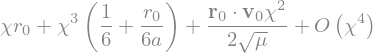

In [6]:
x,r0,rv0,a,mu = symbols("chi,r_0,\mathbf{r}_0\cdot\mathbf{v}_0,a,mu",real=True,positive=True)
psi = x**2/(-a)
c2 =(1-cosh(sqrt(-psi)))/psi
c3 = (-sqrt(-psi) + sinh(sqrt(-psi)))/(sqrt(-psi**3))
mudt = simplify(c3*x**3 + c2*rv0/sqrt(mu)*x**2 + r0*x*(1-psi*c3))
sympy.series(mudt,x=x,x0=0,n=4)

We once again have a cubic polynomial for $\sqrt{\mu}\Delta{t}$, except that this one is an approximation:
$$\chi_0^{3} \cdot \left(\frac{1}{6} - \frac{r_{0}}{6 a}\right) + \frac{\mathbf{r}_0\cdot\mathbf{v}_0 \chi_0^{2}}{2 \sqrt{\mu}} + \chi_0 r_{0} - \sqrt{\mu}\Delta{t} \approx 0$$

Note the sign flip on the $r_0$ term multiplying $\chi^3$ here.  This is due to us defining $a$ as strictly positive and then setting $\psi$ to be a function of $-a$ in the symbolic derivation. We can solve this cubic in exactly the same way we did its parabolic counterpart, to provide ourselves with an initial guess for $\chi$. 

An alternative approach, provided by Bate, Mueller, and White, instead evaluates approximations for $c_2, c_3$ under the assumption that $\psi$ is a large negative number, leading to an initial guess of the form:
$$\chi_0 = \frac{\sqrt{-a}\Delta t}{\vert\Delta t\vert} \ln\left(  \frac{-2\frac{\mu}{a} \Delta t}{\mf r_0 \cdot \mf v_0 + \frac{\Delta{t}}{\vert\Delta{t}\vert} \sqrt{-\mu a} \left(1 - \frac{r_0}{a}\right) }\right) $$

Let's see how well these perform.

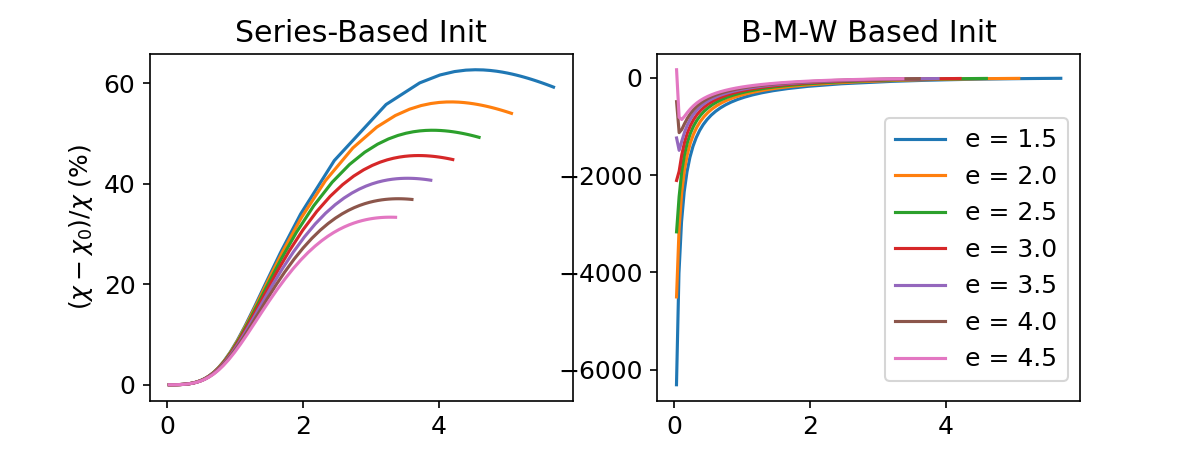

In [7]:
from astrodynamicsbook.kepler import invKepler,c2c3
a = -1               # semi-major axis (arbitrary units)
mu = 1               # gravitational parameter (incredibly arbitrary units)
n = np.sqrt(mu/np.abs(a)**3)  # mean motion (units set by a and mu)
M = np.linspace(-10,10,50) # some mean anomalies
t = M/n                               # time
es = np.arange(1.5, 5, 0.5)
dt = t[1:] - t[0]                     # \Delta{t} assuming t_0 is first element of array

true_chis = []
chi0_series = []
chi0_BMW = []
for e in es:
    H,_,nu = invKepler(M, e, return_nu=True) # invert the time equation
    dH = H[1:] - H[0]                  # \Delta{H}    
    chi = np.sqrt(-a)*dH
    true_chis.append(chi)   # this is the true \chi value
    
    # series-based initial guess
    h = np.sqrt(mu*a*(1-e**2))     # angular momentum
    r0 = h**2/mu/(1+e*np.cos(nu[0]))
    rd0 = h/r0*e*np.sin(nu[0])/(1+e*np.cos(nu[0]))
    a1 = (1/6 - r0/6/a)
    b1 = r0*rd0/2/np.sqrt(mu)
    c1 = r0
    d1 = -np.sqrt(mu)*dt
    k0 = b1**2 - 3*a1*c1
    k1 = 2*b1**3 - 9*a1*b1*c1 + 27*a1**2*d1
    k2 = np.cbrt((k1 + np.sqrt(k1**2 - 4*k0**3))/2)
    chi0_series.append(-(b1+k2+k0/k2)/3/a1)
    
    #B-M-W initial guess
    chi0_BMW.append(np.sqrt(-a)*dt/np.abs(dt)*np.log(-2*mu/a*dt/(r0*rd0 + dt/np.abs(dt)*np.sqrt(-mu*a)*(1-r0/a))))

fig,ax = plt.subplots(1,2,figsize=(8,3))

for chi,chi0s,chi0b,e in zip(true_chis,chi0_series,chi0_BMW,es):
    ax[0].plot(chi,(chi - chi0s)/chi*100,label="e = {:1.1f}".format(e))
    ax[1].plot(chi,(chi - chi0b)/chi*100,label="e = {:1.1f}".format(e))
ax[1].legend(bbox_to_anchor =(1, 0.85))
ax[0].set_xlabel('$\chi$')
ax[0].set_ylabel('$(\chi - \chi_0)/\chi$ (%)');
ax[1].set_xlabel('$\chi$')
ax[0].set_title('Series-Based Init')
ax[1].set_title('B-M-W Based Init');

Not entirely unexpectedly, the series-based initialization works quite well for small values of $\chi$, but has increasing error with larger $\chi$ (as the dropped higher orders of the expansion become more and more important). On the other hand, the intializatoin scheme derived by assuming a large $\psi$ (and therefore a large $\chi$ works very well as $\chi$ increases.  It fails pretty spectacularly for small values of $\chi$, but this typically does not prevent the Newton-Raphson scheme from converging.  The series-based solution is much more computationally intensive, and also has the drawback that in a small number of cases, the form of the selected root will produce imaginary values, therefore requiring additional processing. As such, the Bate, Mueller, White initialization is typically preferred. 

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Time to test this all out. Write a function that takes in $\mf r_0, \mf v_0, \Delta{t}$, and $\mu$ and returns the propagated orbital state vectors ($\mf r$ and $\mf v$) using the universal variable formulation of the $f$ and $g$ functions.  Test your function on all different conic sections.
</div>

In [8]:
def universal_variable_fg(r0, v0, mu, dt):
    """Propagate orbital state vectors by delta t via universal variable-based f and g

    Args:
        r0 (numpy.ndarray):
            Components of orbital radius. 3 x 1
        v0 (numpy.ndarray):
            Components of orbital velocity. 3 x 1
        mu (float):
            Gravitational parameter.  Units must be consistent with r0, v0 
        dt (float):
            Propagation time. Same time unit as in mu and v0

    Returns:
        tuple:
            r (numpy.ndarray):
                Components of orbital radius (3x1)
            v (numpy.ndarray):
                Components of orbital velocity (3x1)

    """



    # write some code!


In [9]:
# Test out your function on open and closed orbits





As usual, we would never ask you to do something that wasn't already done.  Let's see how the book's version of the code works.

In [10]:
from astrodynamicsbook.kepler import kepler2orbstate, universalfg
# First, let's generate 50 arbitrary orbits
norb = 50
a = np.random.rand(norb)*2-1 # semi-major axes uniformly distributed in -1,1
e = np.zeros(norb) # assign eccentricities by orbit type
closed = a > 0
nclosed = len(np.where(closed)[0])
e[closed] = np.random.rand(nclosed)
e[~closed] = (np.random.rand(norb-nclosed)+1)*5
#force a few orbits to be parabolic and circular
e[np.where(closed)[0][:5]] = 0
e[np.where(~closed)[0][:5]] = 1
a[np.where(~closed)[0][:5]] *= -1

mu = 1 #arbitrary mu, same for all orbits
n = np.sqrt(mu/np.abs(a)**3)  # mean motion
n[e == 1] *= 2 # Treat a as semi-parameter for parabolae
M0 = np.random.randn(norb)*np.pi/2 #randomize initial mean anomaly
E0,_,nu0 = invKepler(M0, e, return_nu=True)

# randomly distribute orientation angles
O = np.random.rand(norb)*2*np.pi
w = np.random.rand(norb)*2*np.pi
I = np.arccos(np.random.rand(norb)*2 - 1)

# Evaluate initial conditions
r0, v0 = kepler2orbstate(a, e, O, I, w, mu, nu0)

# Now propagate 1 Time unit
r1, v1 = universalfg(r0, v0, mu, 1)

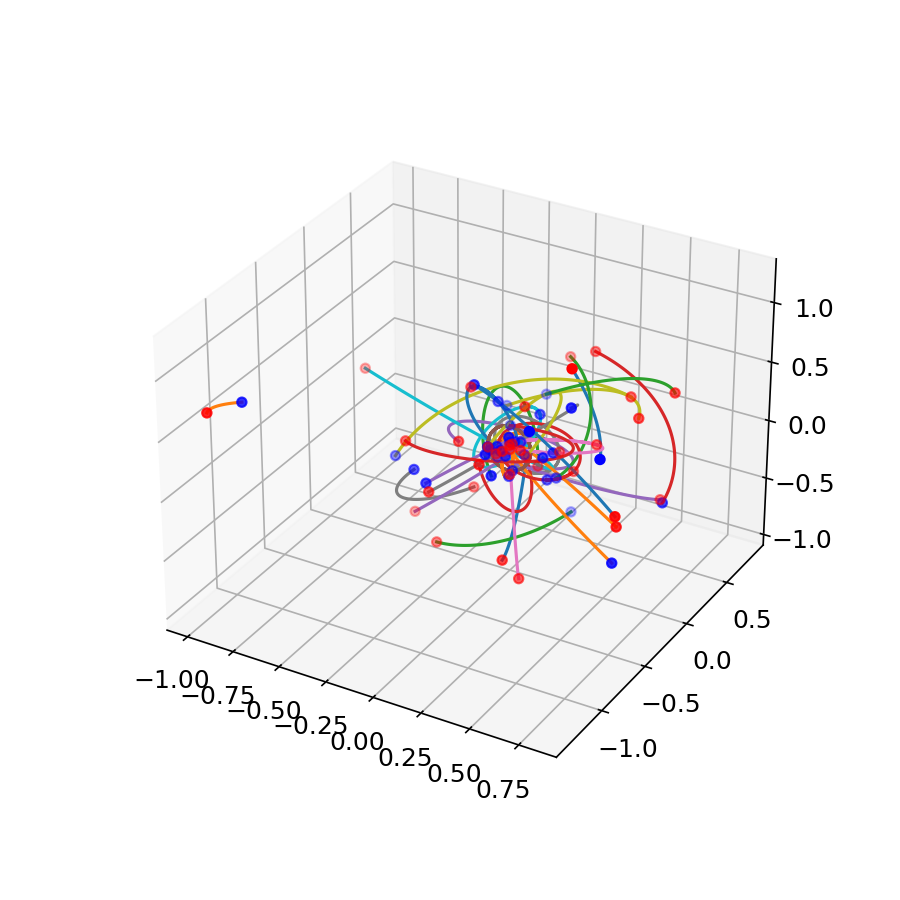

In [11]:
# Let's plot the closed orbits over 1 time unit
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

t = np.linspace(0,1,101)
inds = np.where(e < 1)[0]
for j in inds:
    M = n[j]*t+ M0[j]
    _,_,nu = invKepler(M, e[j], return_nu=True)
    rs,_ = kepler2orbstate(a[j], e[j], O[j], I[j], w[j], mu, nu)
    ax.plot(rs[:,0],rs[:,1],rs[:,2])
ax.scatter(r0[inds,0],r0[inds,1],r0[inds,2],facecolor='b')
ax.scatter(r1[inds,0],r1[inds,1],r1[inds,2],facecolor='r')

1
3
8
13
14
18
20
25
26
27
31
36
46
47
49


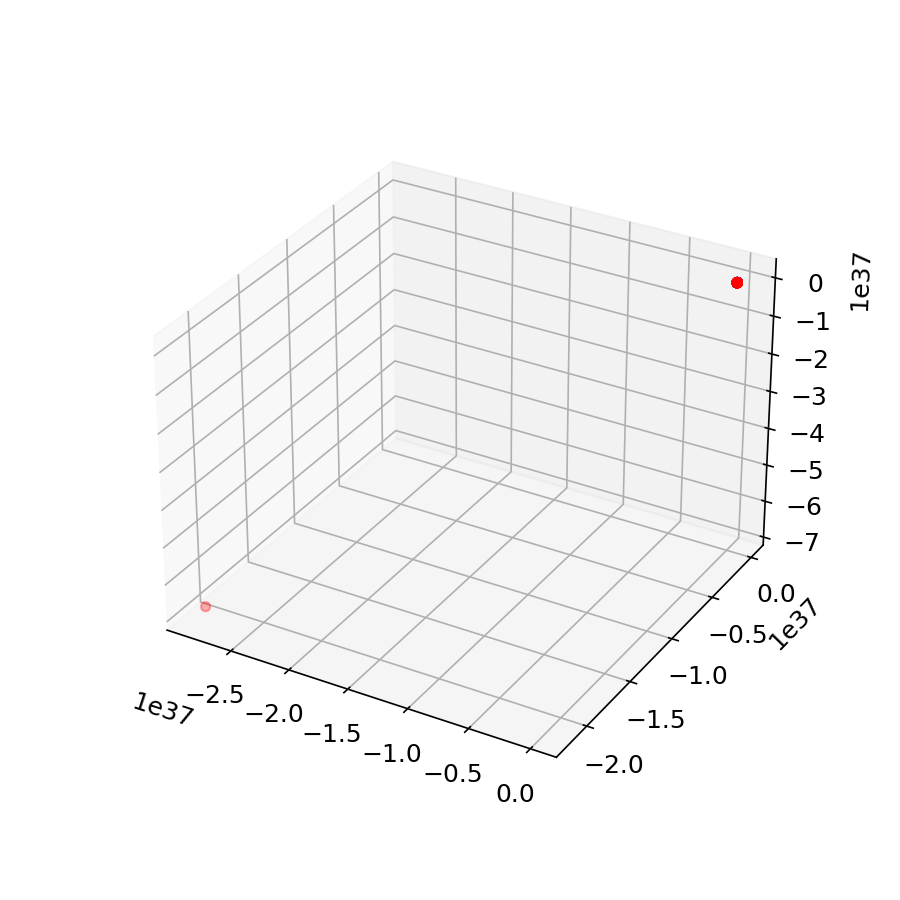

In [19]:
# And now the open orbits over 1 time unit
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

t = np.linspace(0,1,101)
inds = np.where(e >= 1)[0]
for j in inds:
    print(j)
    M = n[j]*t+ M0[j]
    _,_,nu = invKepler(M, e[j], return_nu=True)
    rs,_ = kepler2orbstate(a[j], e[j], O[j], I[j], w[j], mu, nu)
    ax.plot(rs[:,0],rs[:,1],rs[:,2])
    
ax.scatter(r0[inds,0],r0[inds,1],r0[inds,2],facecolor='b')
ax.scatter(r1[inds,0],r1[inds,1],r1[inds,2],facecolor='r')

In [13]:
inds

array([ 1,  3,  8, 13, 14, 18, 20, 25, 26, 27, 31, 36, 46, 47, 49])

In [ ]:
# This is just here to generate the link to the next notebook
genNextLink()